<a href="https://colab.research.google.com/github/chandankumar7/FACE_DETECTION-/blob/master/Learning_faceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install cmake dlib face_recognition numpy opencv-python

In [3]:
!pip install opencv-python

In [4]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [5]:
%cd /gdrive/My Drive/Face_detection

/gdrive/My Drive/Face_detection


In [6]:
ls

 abc.jpg         'jeff bezos.jpg'                test2.jpg   test6.jpg
'elon musk.jpg'   Learning_faceDetection.ipynb   test3.jpg
 face_rec.ipynb  'test1 (1).jpg'                 test4.jpg
 faces/           test1.jpg                      test5.jpg


In [7]:
import face_recognition as fr
import cv2
import os,shutil
import numpy as np
from google.colab.patches import cv2_imshow

In [8]:
def get_encoded_faces():
    
    encoded = {}

    for dirpath, dnames, fnames in os.walk("./faces"):
        for f in fnames:
            if f.endswith(".jpg") or f.endswith(".png"):
                face = fr.load_image_file("faces/" + f)
                encoding = fr.face_encodings(face)[0]
                encoded[f.split(".")[0]] = encoding

    return encoded



In [10]:
def classify_face(im):
    
    faces = get_encoded_faces()
    faces_encoded = list(faces.values())
    known_face_names = list(faces.keys())

    img = cv2.imread(im, 1)
  
    face_locations = fr.face_locations(img)
    unknown_face_encodings = fr.face_encodings(img, face_locations)

    face_names = []
    for face_encoding in unknown_face_encodings:
        # See if the face is a match for the known face(s)
        matches = fr.compare_faces(faces_encoded, face_encoding)
        name = "Unknown"

        # use the known face with the smallest distance to the new face
        face_distances = fr.face_distance(faces_encoded, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]

        face_names.append(name)

        for (top, right, bottom, left), name in zip(face_locations, face_names):
            # Draw a box around the face
            cv2.rectangle(img, (left-20, top-20), (right+20, bottom+20), (255, 0, 0), 2)

            # Draw a label with a name below the face
            cv2.rectangle(img, (left-20, bottom -15), (right+20, bottom+20), (255, 0, 0),cv2.FILLED)
            cv2.putText(img, name, (left -20, bottom + 15), cv2.FONT_HERSHEY_DUPLEX,0.5, (255, 255, 255), 1)


    # Display the resulting image
    while True:

        cv2_imshow(img)
        return face_names 
     


In [11]:
def learning(image):
  c_face =classify_face(image)
  if 'Unknown' in c_face:
     que = input("There is an Unknown Face Would You like Add it to system :")
     if que == 'yes' or que == "Yes":
       imageFileName = input("Enter the name of the image file: ")
       shutil.move(imageFileName, '/gdrive/My Drive/Face_detection/faces')
       print(learning(image))
     else:
       print(c_face) 
  else:
     print(c_face)
  


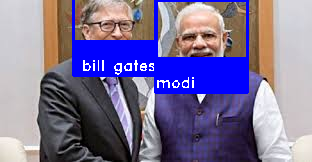

[' bill gates', 'modi']


In [12]:
learning("test5.jpg")